In [1]:

import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile

from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from shor_algo_adder_method import *
from qiskit.circuit.library import DraperQFTAdder



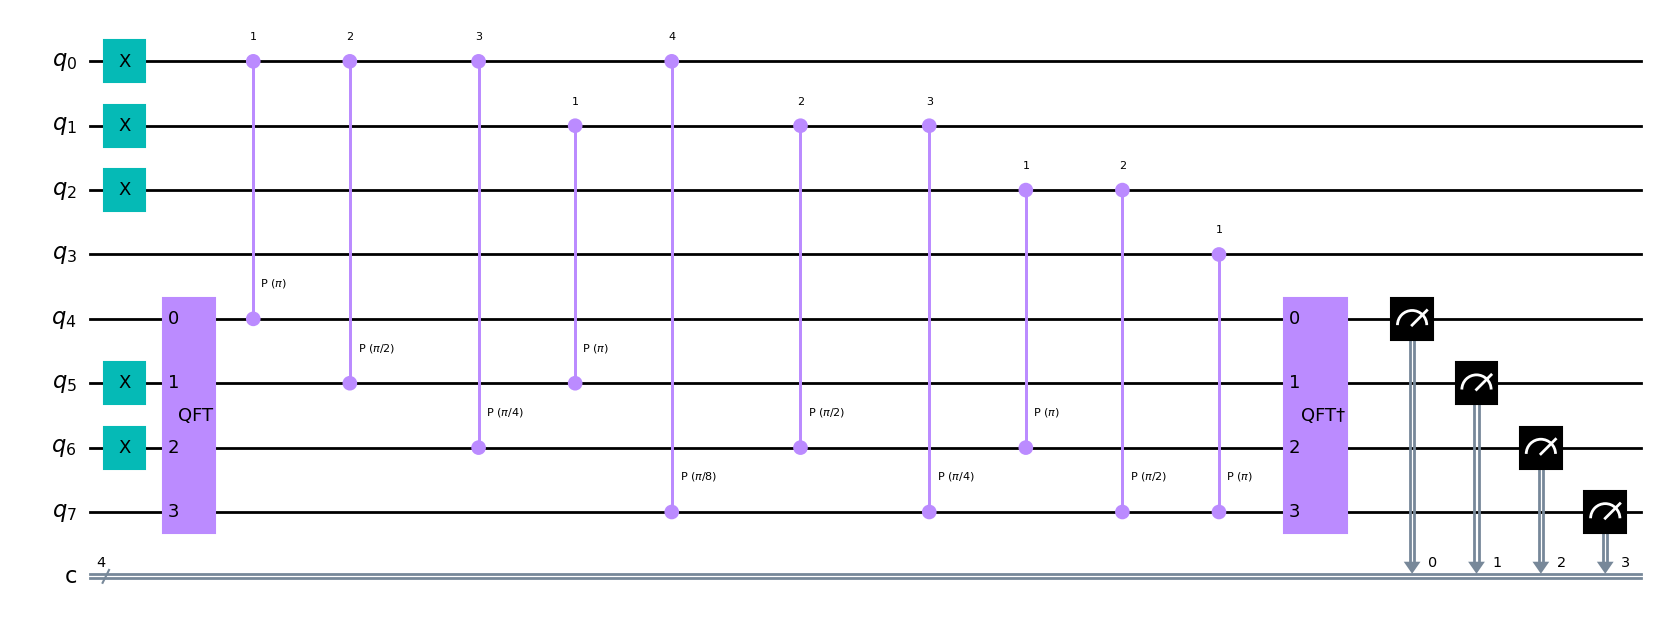

In [3]:
n = 8
q = QuantumRegister(n, 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

thiers = QuantumCircuit(q, c)
main = QuantumCircuit(q, c)

a = 7
b = 6

set_start_state(thiers, a, 0)
set_start_state(thiers, b, n//2)

set_start_state(main, a, 0)
set_start_state(main, b, n//2)


main.append(qft(math.ceil(n/2), False), range(n//2, n))
main = main.compose(adder(n//2, kind="fixed"), qubits=range(n))
# main.append(adder(n//2, kind="fixed"), range(n))
main.append(qft_dagger(math.ceil(n/2), False), range(n//2, n))

thiers = thiers.compose(DraperQFTAdder(n//2, kind="fixed").decompose(), range(n))
# thiers.append(DraperQFTAdder(n//2, kind="fixed"), range(n))

thiers.measure(range(n//2, n), range(math.ceil(n/2)))
main.measure(range(n//2, n), range(math.ceil(n/2)))

main.draw("mpl")

In [ ]:
b = 12
a = 15
n = 4

q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
classic_a = QuantumCircuit(q, c)

set_start_state(classic_a, b, 0)

classic_a.append(qft(n, False), range(n))
classic_a = classic_a.compose(adder_classic_a(n, a, kind="fixed"), range(n))
classic_a.append(qft_dagger(n, False), range(n))

classic_a.measure(range(n), range(n))

classic_a.draw('mpl')


In [ ]:
main.draw('mpl')

In [ ]:
sim = Aer.get_backend("aer_simulator")
qc_init = ft.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_thiers = transpile(thiers, aer_sim)
t_main = transpile(main, aer_sim)
t_classic = transpile(classic_a, aer_sim)


counts_thiers = aer_sim.run(t_thiers).result().get_counts()
count_main = aer_sim.run(t_main).result().get_counts()
count_cls = aer_sim.run(t_classic).result().get_counts()
plot_histogram([count_main, counts_thiers, count_cls], legend=["main", "thiers", "cls"])

In [ ]:
n = 5
q = QuantumRegister(n, 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

subtract = QuantumCircuit(q, c)

q = QuantumRegister(math.ceil(n/2), 'q')
c = ClassicalRegister(math.ceil(n/2), 'c')

subtract2 = QuantumCircuit(q, c)

a = 1
b = 3

set_start_state(subtract, a, 0)
set_start_state(subtract, b, n//2)

set_start_state(subtract2, b, 0)


subtract.append(qft(math.ceil(n/2), False), range(n//2, n))
# main = main.compose(adder(n//2, kind="half"), qubits=range(n))
# subtract = subtract.compose(adder(n//2, kind="half").inverse(), range(n))
subtract.append(subtracter(n//2), range(n))
subtract.append(qft_dagger(math.ceil(n/2), False), range(n//2, n))

subtract2.append(qft(math.ceil(n/2), False), range(math.ceil(n/2)))
# main = main.compose(adder(n//2, kind="half"), qubits=range(n))
# subtract = subtract.compose(adder(n//2, kind="half").inverse(), range(n))
subtract2.append(subtracter_classic_a(n//2, a), range(math.ceil(n/2)))
subtract2.append(qft_dagger(math.ceil(n/2), False), range(math.ceil(n/2)))

# thiers = thiers.compose(DraperQFTAdder(n//2, kind="half").decompose(), range(n))

subtract.measure(range(n//2, n), range(math.ceil(n/2)))
subtract2.measure(range(math.ceil(n/2)), range(math.ceil(n/2)))

subtract.draw("mpl")

In [ ]:
subtract2.draw("mpl")

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_subtract = transpile(subtract, aer_sim)
t_subtract2 = transpile(subtract2, aer_sim)

counts_subtract = aer_sim.run(t_subtract).result().get_counts()
counts_subtract2 = aer_sim.run(t_subtract2).result().get_counts()
plot_histogram([counts_subtract, counts_subtract2], legend=["draper", "a inside"])

In [ ]:
n = 4
N = 11

a = 2
b = 0
x = 6

a_mod_n = QuantumCircuit(2*n + 4, n+1)

a_mod_n.h(0)
set_start_state(a_mod_n, x, 1)
set_start_state(a_mod_n, b, n+2)


# a_mod_n = a_mod_n.compose(add_mod_n(a, N), range(n+3))
a_mod_n = a_mod_n.compose(U(N, a, 1).decompose(), range(2*n + 4))
# a_mod_n = a_mod_n.compose(c_mult_a_mod_n(a, N), range(2*n + 4))

a_mod_n.measure(range(1, n+2), range(n+1))
a_mod_n.draw('mpl', fold=-1)

In [ ]:
n = 4
N = 11

a = 4
x = 3
b = 2

ax_mod_n = QuantumCircuit(2*n + 4, n+1)
ax_mod_n.x(0)
set_start_state(ax_mod_n, x, 1)
set_start_state(ax_mod_n, b, n+2)


# ax_mod_n = ax_mod_n.compose(c_mult_a_mod_n(a, N), range(2*n + 4))
ax_mod_n.append(c_mult_a_mod_n(a, N), range(2*n + 4))

ax_mod_n.measure(range(n+2, 2*n+3), range(n+1))
ax_mod_n.draw('mpl', fold=-1)

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
t_subtract = transpile(ax_mod_n, aer_sim)

counts_subtract = aer_sim.run(t_subtract).result().get_counts()
plot_histogram(counts_subtract)